# Openness and fracture normal stress

The analysis of the openness relative to Forsmark stress (started in the previous notebook) state is deepened by focusing on the normal stress $\sigma_n$. <br> Our analysis consists in separating the dataset in different groups: 
- by orientations
- by depths 
- by deformation zones or fracture domaines

### Python packages and functions

In [205]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt

path=r'python_functions'
sys.path.append(path)

import utils_fop as uF #functions to calculate openness

### Retrieve Forsmark fracture dataset, with stresses calculated in previous notebook

In [206]:
input_folder = r'input_data'
filename = 'p_frac_core_select_with_stresses'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = '\t')

## 1) Openness as a function of $\sigma_n$

We compute openness in bins of normal stress. To do so, we use the function 'fop' (see 'python_function/utils_fop'), with the parameter 'norm_stress':

In [207]:
bin_number=30
var = 'norm_stress'
analysis = uF.fop(all_data,var,bin_number=bin_number)

We set apart bins with low number of data (N):

In [208]:
min_number=100 # minimum number of data
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]

Plot:

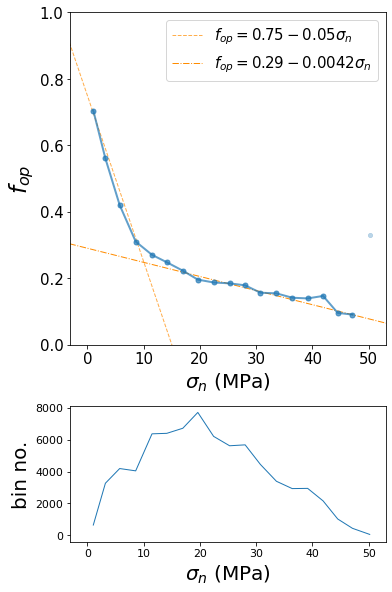

In [209]:
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

# plot openness
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, linewidth = 2)
ax.scatter(data_nvalid[var], data_nvalid['fop32'], marker='o', alpha=0.3, s = 20, linewidth = 0.5) 
# plot data number N per bin
ax2.plot(analysis[var], analysis['N'], linestyle = '-', linewidth = 1)

# plot fitting lines
x = np.linspace(-5,55)
y1 = 0.75 - 0.05*x
y2 = 0.29 - (0.017/4)*x
ax.plot(x, y1, '--', color = 'darkorange', label = '$f_{op} = 0.75 - 0.05\sigma_n$', linewidth = 1, zorder = 0, alpha=0.7)
ax.plot(x, y2, '-.', color = 'darkorange', label = '$f_{op} = 0.29 - 0.0042\sigma_n$', linewidth = 1, zorder = 0)

# format graph
ax.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_xlim(-3,53)
ax2.set_xlim(-3,53)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', 'sigma_n')
fig.savefig(file_path)
fig.clf()

## 2) Analysis with different orientations groups

Orientation groups and plot properties :

In [210]:
angle= [(0,90),(0,20),(20,65),(65,90)]
name = ['All','Horizontal (0-20)', 'Intermediate (20-65)', 'Vertical (65-90)']
color = ['black','crimson', 'darkblue', 'green']
lineWidth = [3,1.5,1.5,1.5]
z_order = [10,40,30,20]

Compute openness in bin of normal stress and plot, for the different orientation groups :

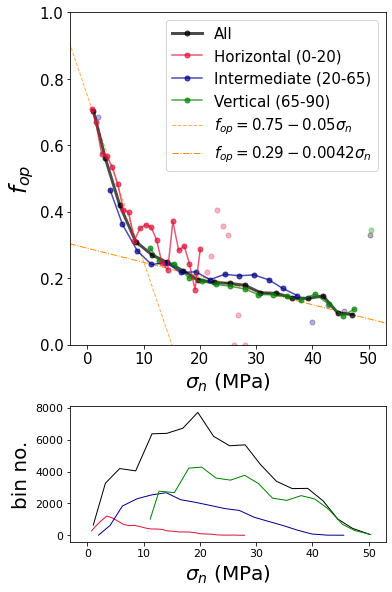

In [211]:
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

# loop over orientation groups
for i,_angle in enumerate(angle):
    _name=name[i]
    
    # select data by orientation group
    dataframe_a=all_data.loc[(all_data['DIP(degrees)'] <= angle[i][1]) & (all_data['DIP(degrees)'] >=  angle[i][0])].copy()
    
    # compute openness in bins of normal stress
    analysis = uF.fop(dataframe_a,var,bin_number=bin_number)
    
    #select bins with low number of data (N)
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    
    # plot openness
    ax.plot(data_valid[var] , data_valid['fop32'], marker='o', markersize = 5, linestyle = '-', linewidth = lineWidth[i], alpha=0.7, color = color[i], zorder = z_order[i], label = _name)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], marker='o', markersize = 5, linestyle = '', alpha=0.3, color = color[i]) 
    
    # plot data number N per bin
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = color[i], linewidth = 1, label = _name)

# plot fitting lines
x = np.linspace(-5,55)
y1 = 0.75 - 0.05*x
y2 = 0.29 - (0.017/4)*x
ax.plot(x, y1, '--', color = 'darkorange', label = '$f_{op} = 0.75 - 0.05\sigma_n$', linewidth = 1, zorder = 0, alpha=0.7)
ax.plot(x, y2, '-.', color = 'darkorange', label = '$f_{op} = 0.29 - 0.0042\sigma_n$', linewidth = 1, zorder = 0)

# format graph
ax.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_xlim(-3,53)
ax2.set_xlim(-3,53)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', 'sigma_n_by_orientations')
fig.savefig(file_path)
fig.clf()


## 2) Analysis with different depth groups

In [212]:
#---depth groups and plot properties
depth_bins = [0,150,300,400,600,1000]
name = ['0-150 m','150-300 m', '300-400 m', '400-600 m', '600-1000 m']
z_order = [40,30,20,10]

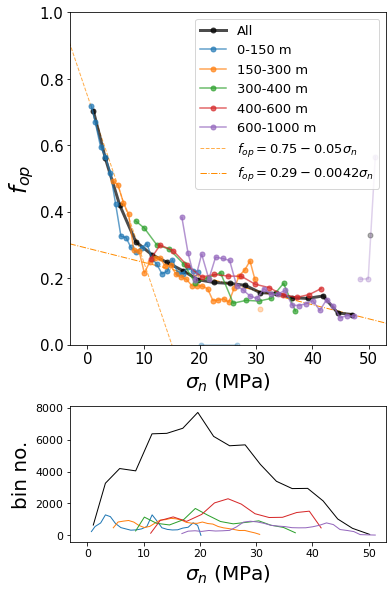

In [213]:
#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

    #all depths
analysis = uF.fop(all_data,var,bin_number=bin_number)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], linestyle = '', marker='o', markersize = 5, alpha = 0.3, color = 'black') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

    #by depth group
for i,_depth in enumerate(depth_bins[:-1]):
    _name=name[i]
    color = plt.cm.tab10(i)
  
    # select depth group
    dataframe_a=all_data.loc[(-all_data['ELEVATION_ADJUSTEDSECUP'] <= depth_bins[i+1]) & (-all_data['ELEVATION_ADJUSTEDSECUP'] >=  depth_bins[i])].copy()
    
    analysis = uF.fop(dataframe_a,'norm_stress',bin_number=bin_number)#, min=bin_min, max = bin_max)
    data_valid= analysis.loc[analysis['N']>=min_number]
    data_nvalid=analysis.loc[analysis['N']< min_number]
    ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, linewidth = 1.5, color = color, label = _name)
    ax.plot(data_nvalid[var], data_nvalid['fop32'], marker='o', markersize = 5, alpha=0.3, color = color) 
    ax2.plot(analysis[var], analysis['N'], linestyle = '-', linewidth = 1, label = _name, color = color)
    
# plot fiting lines
x = np.linspace(-5,55)
y1 = 0.75 - 0.05*x
y2 = 0.29 - (0.017/4)*x
ax.plot(x, y1, '--', color = 'darkorange', label = '$f_{op} = 0.75 - 0.05\sigma_n$', linewidth = 1, zorder = 0, alpha=0.7)
ax.plot(x, y2, '-.', color = 'darkorange', label = '$f_{op} = 0.29 - 0.0042\sigma_n$', linewidth = 1, zorder = 0)

#format graph
ax.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 13, loc = 'upper right')
ax.set_xlim(-3,53)
ax2.set_xlim(-3,53)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)


fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', 'sigma_n_by_depth')
fig.savefig(file_path)
fig.clf()

## 3) Analysis by differencing fracture domains and deformation zones

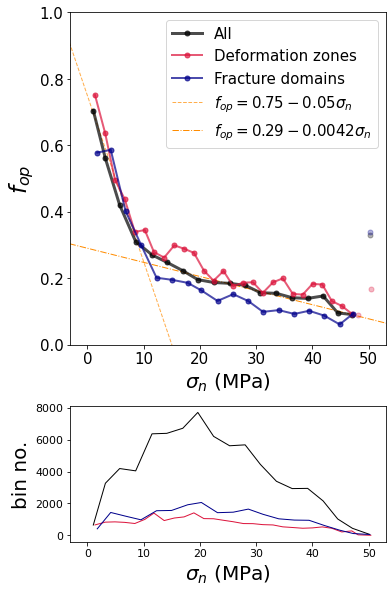

In [215]:
#---plot
fig = plt.figure()
ax = plt.subplot2grid((3, 1), (0, 0), rowspan = 2) 
ax2 = plt.subplot2grid((3, 1), (2, 0), rowspan = 1)

    #all fractures
analysis = uF.fop(all_data,var,bin_number=bin_number)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'black', linewidth = 3, label = 'All')
ax.plot(data_nvalid[var], data_nvalid['fop32'], marker='o', linestyle = '', markersize = 5, alpha=0.3, color = 'black') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'black', linewidth = 1, label = 'All')

    #Deformation Zones fractures
dz_data = all_data.loc[all_data['DEFORMATION_ZONE'].notnull()]
analysis = uF.fop(dz_data,var,bin_number=bin_number)#, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'crimson', linewidth = 2, label = 'Deformation zones')
ax.plot(data_nvalid[var], data_nvalid['fop32'], marker='o', linestyle = '', markersize = 5, alpha=0.3, color = 'crimson') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'crimson', linewidth = 1, label = 'Deformation zones')

    #Fracture domains
ffm_data = all_data.loc[all_data['FRACTURE_DOMAIN'].isin(['FFM01', 'FFM02', 'FFM03', 'FFM04', 'FFM05', 'FFM06'])]
analysis = uF.fop(ffm_data,var,bin_number=bin_number)#, min=bin_min, max = bin_max)
data_valid= analysis.loc[analysis['N']>=min_number]
data_nvalid=analysis.loc[analysis['N']< min_number]
ax.plot(data_valid[var] , data_valid['fop32'], linestyle = '-', marker='o', markersize = 5, alpha=0.7, color = 'darkblue', linewidth = 2, label = 'Fracture domains')
ax.plot(data_nvalid[var], data_nvalid['fop32'], marker='o', linestyle = '', markersize = 5, alpha=0.3, color = 'darkblue') 
ax2.plot(analysis[var], analysis['N'], linestyle = '-', color = 'darkblue', linewidth = 1, label = 'Fracture domains')
    
# plot fiting lines
x = np.linspace(-5,55)
y1 = 0.75 - 0.05*x
y2 = 0.29 - (0.017/4)*x
ax.plot(x, y1, '--', color = 'darkorange', label = '$f_{op} = 0.75 - 0.05\sigma_n$', linewidth = 1, zorder = 0, alpha=0.7)
ax.plot(x, y2, '-.', color = 'darkorange', label = '$f_{op} = 0.29 - 0.0042\sigma_n$', linewidth = 1, zorder = 0)

# format graph
ax.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax.set_ylabel('$f_{op}$', fontsize = 23)
ax2.set_xlabel('$\sigma_n$ (MPa)', fontsize = 20)
ax2.set_ylabel('bin no.', fontsize = 20)
ax.legend(fontsize = 15)
ax.set_xlim(-3,53)
ax2.set_xlim(-3,53)
ax.set_ylim(0,1)
ax.tick_params(labelsize = 15)
ax2.tick_params(labelsize = 11)

fig.set_tight_layout(True)
fig.set_size_inches(400./fig.dpi,600./fig.dpi)
plt.show()

#save figure
file_path = os.path.join('output_figures', 'sigma_n_by_ffm_dz')
fig.savefig(file_path)
fig.clf()